In [1]:
from seahorse import Graph, SContainer
from seahorse import gwrap

from random import randint
import pandas as pd
import numpy as np

## Custom functions provided with the seahorse package

Home made methods to produce easily custom graph

- Colored regplot : Regular regplot with either categories or colorbar
- Cat plot : Joined regular plot with cumulated x values
- Twinx barplot : Easy barplot with two y-axis
- Stacked barplot : Easy stacked barplot
- Distribution barplot : Raw data distrubution with a custom window size

## Colored regplot

```python3
colored_regplot(col1, col2, data, ax, cbar=None, cbar_label=None, hue=None, hue_color=None, 
 	kws_scatter={}, kwg_corr={}, ** kwargs)
```

```kwg_corr``` are passed through pandas ```dataframe.corr``` and 
```kwargs``` are passed through ```seaborn.regplot```

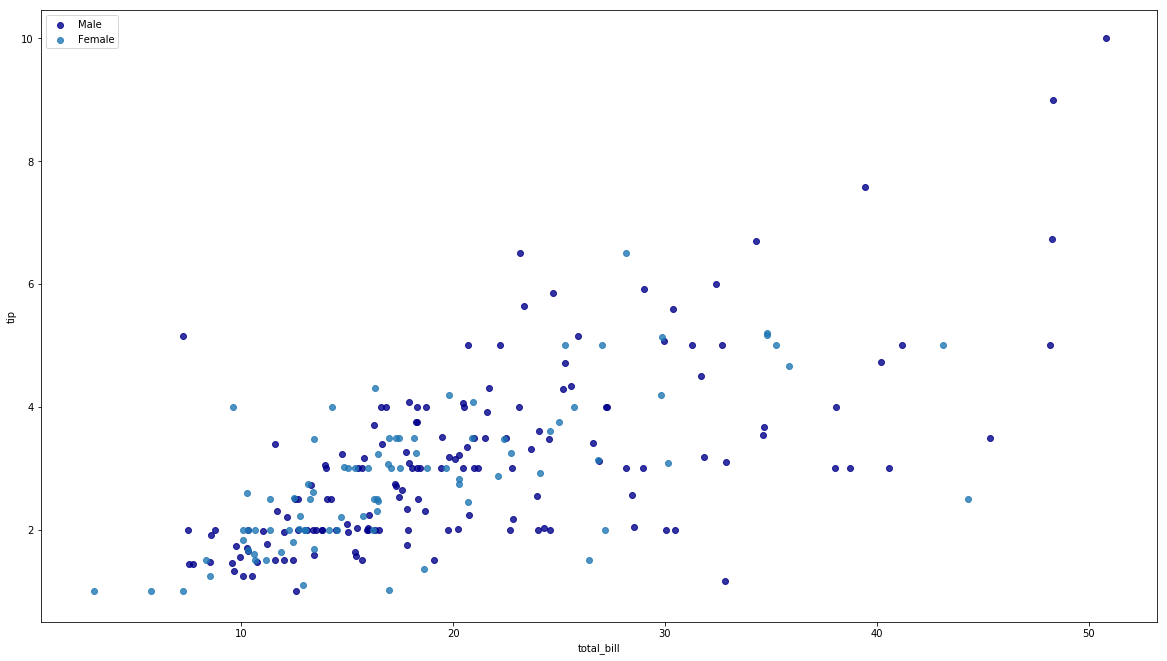

In [2]:
df = gwrap.sns.load_dataset("tips")

graph = Graph(df)
graph.shs.colored_regplot("total_bill", "tip", fit_reg=False, hue="sex", hue_color={"Male" : "DarkBlue"})
graph.show()

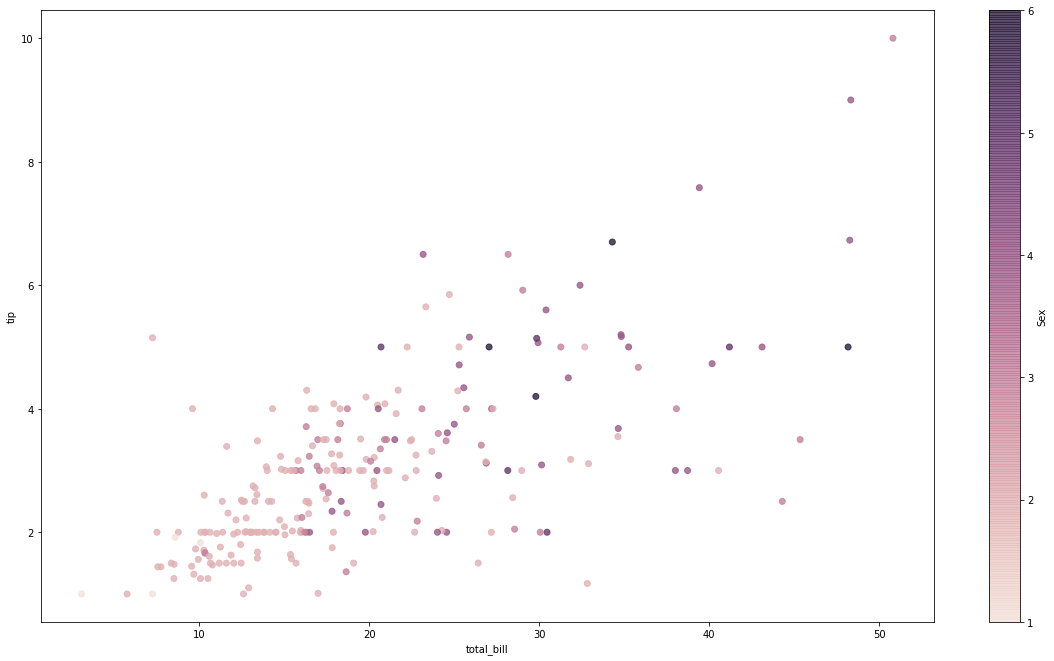

In [3]:
graph = Graph(df)
graph.shs.colored_regplot("total_bill", "tip", fit_reg=False, cbar="size", cbar_label="Sex")
graph.show()

## Cat plot

``` python3
cat_plot(x, y, xhue, data, ax, yhue=None, funsort=None, legend=True, tick_rot=0, background=False, 
        start_zero=False, xhue_size={}, bgcolor=None, fill=False, ** kwargs)
```

```kwargs``` are passed through matplotlib ```ax.plot```

In [4]:
df = pd.DataFrame(np.random.randn(2000, 1), index=pd.date_range('1/1/2000', periods=2000), columns=["value"])
df["day"], df["month"], df["year"] = df.index.day, df.index.month, df.index.year
df = df.groupby(["year", "day"])["value"].mean().reset_index()

df.head(5)

,year,day,value
0,2000,1,-0.442722
1,2000,2,0.434721
2,2000,3,0.225252
3,2000,4,-0.163631
4,2000,5,-0.495984


{2000: 1.0, 2001: 32.0, 2002: 63.0, 2003: 94.0, 2004: 125.0, 2005: 156.0}

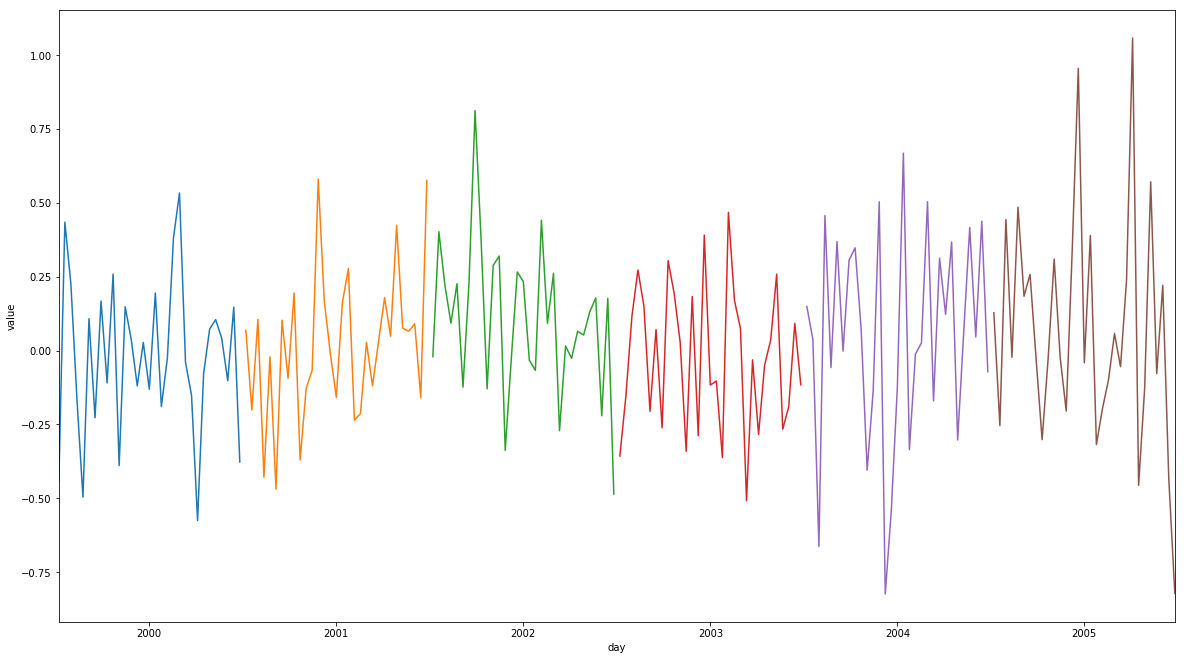

In [5]:
graph = Graph(df)
graph.shs.cat_plot("day", "value", "year")

{2000: 1.0, 2001: 32.0, 2002: 63.0, 2003: 94.0, 2004: 125.0, 2005: 156.0}

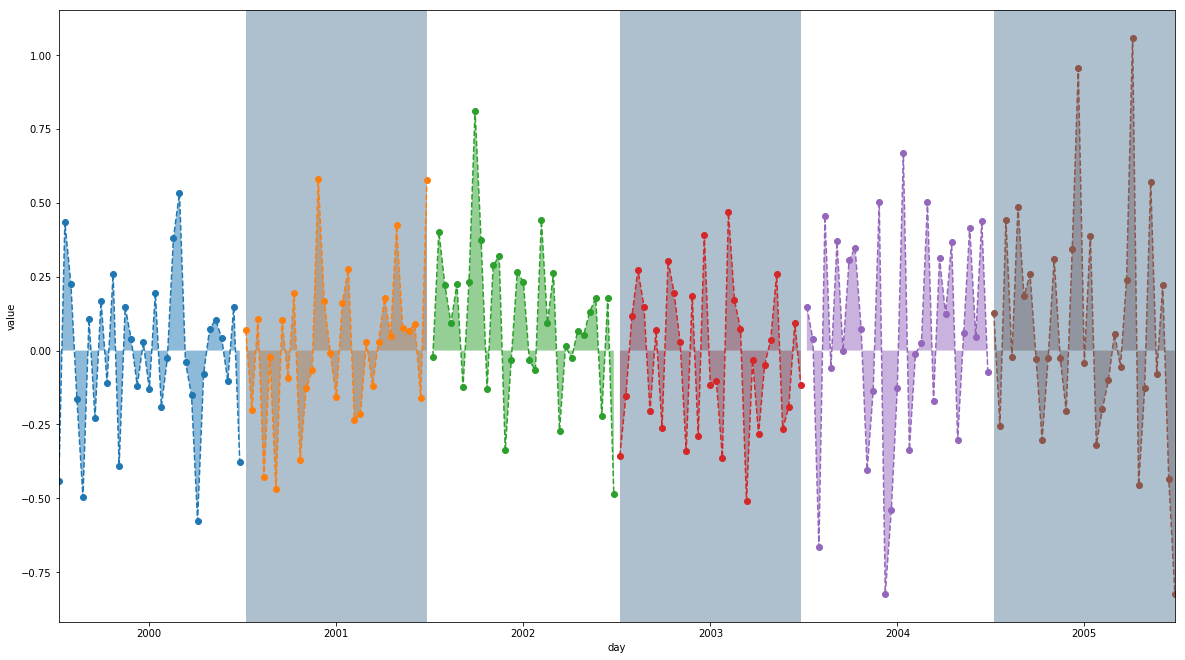

In [6]:
graph = Graph(df)
graph.shs.cat_plot("day", "value", "year", background=True, bgcolor="#5e819d", marker="o", linestyle="--", fill=True)

Kind of similar to :

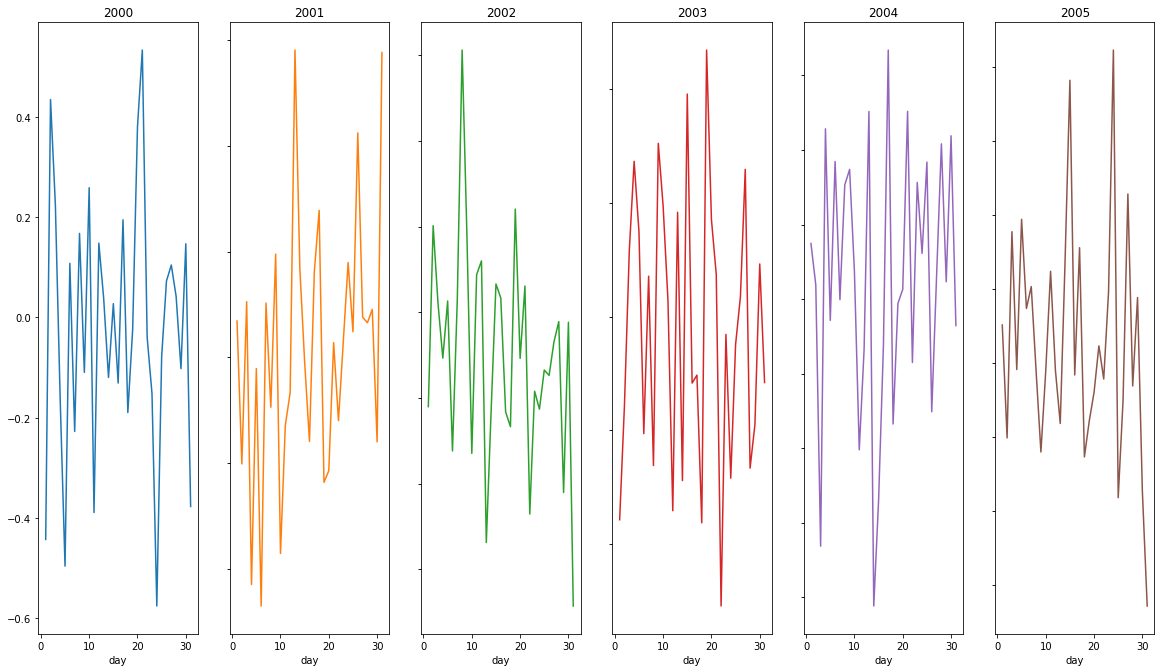

In [7]:
sc = SContainer(df, 1, 6)
sc.groupby("year").df.plot(x="day", y="value", sharey=True, legend=False)

## Barplots : Twinx

``` python3
barplot_twinx(left, right, data, ax, colors=None, width=.8, border_size=.5, ylabels=(None, None))
```

(<matplotlib.axes._subplots.AxesSubplot at 0x7f79d803bba8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f79d81484a8>)

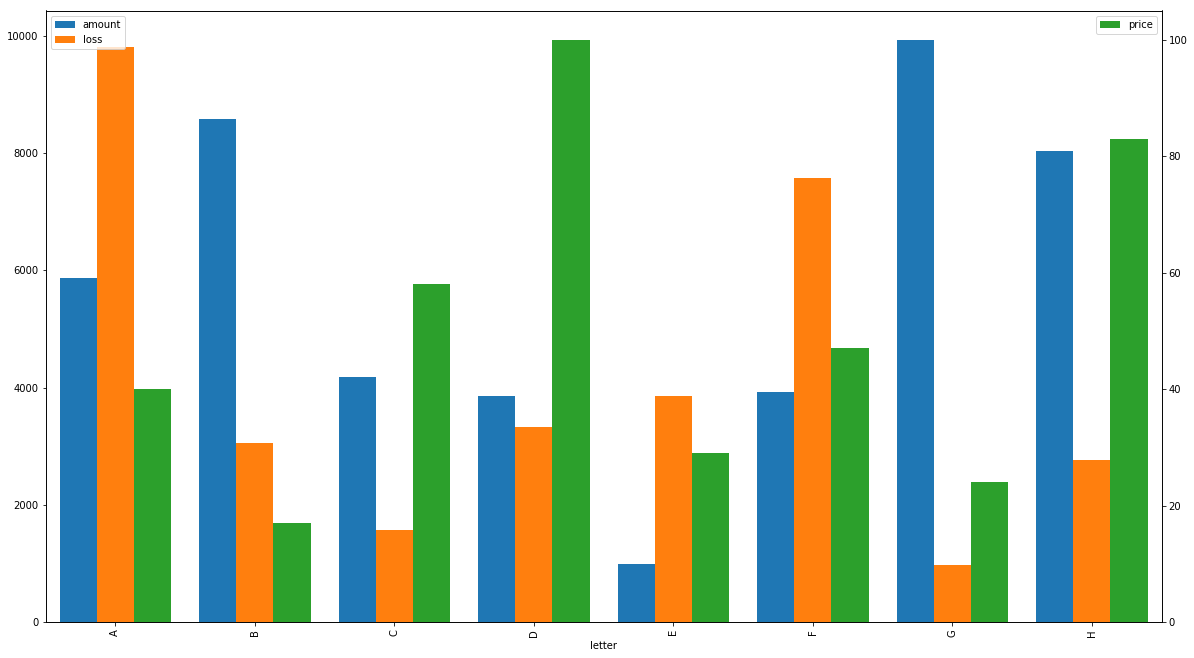

In [8]:
df = pd.DataFrame([{"letter" : letter, 
                    "amount" : randint(0, 10000), 
                    "loss" :   randint(0, 10000), 
                    "price" :  randint(0, 100)}
                   for letter in "ABCDEFGH"]).set_index("letter")

graph = Graph(df)
graph.shs.barplot_twinx(["amount", "loss"], "price")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f79d63fce48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f79d82ae438>)

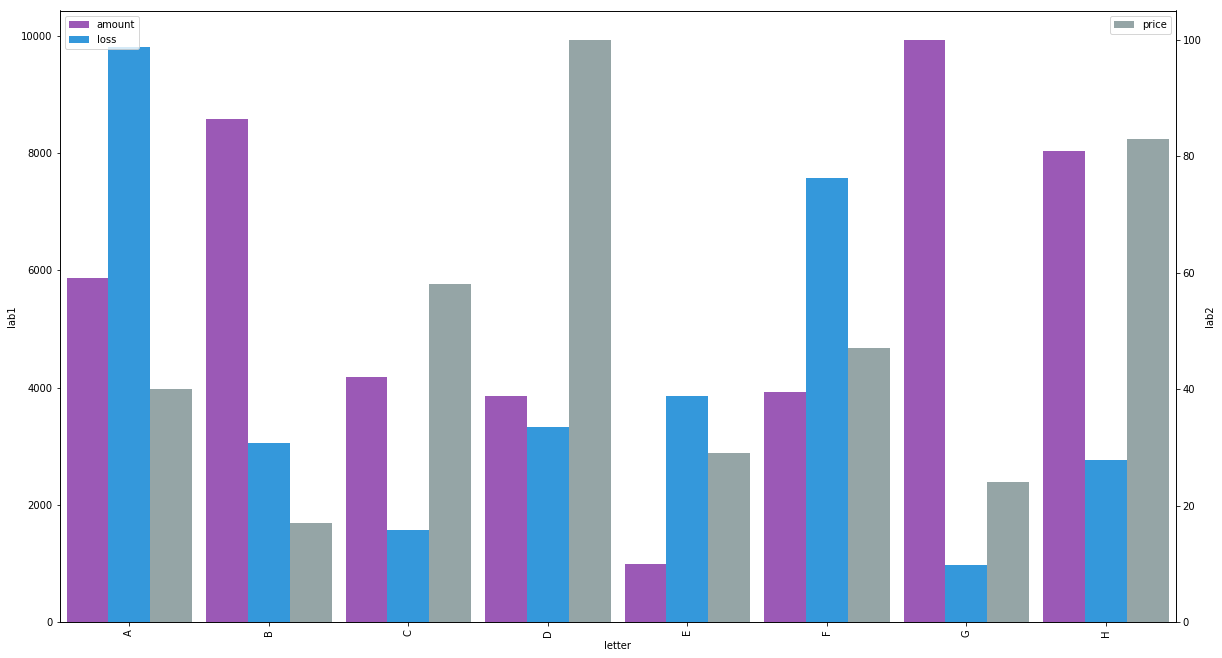

In [9]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
graph = Graph(df)
graph.shs.barplot_twinx(["amount", "loss"], "price", colors=flatui, width=.9, ylabels=("lab1", "lab2"))

## Barplots : Stacked

``` python3
stacked_barplot(x, y, hue, data, ax, prop=False, sort_values=False, stack_order=None, * args, ** kwargs)
```

```args``` and ```kwargs``` are passed through ```dataframe.plot.bar```

In [10]:
df = gwrap.sns.load_dataset("tips")
df = df.groupby(["day", "sex"])["tip"].sum().reset_index()

df.head(5)

,day,sex,tip
0,Thur,Male,89.41
1,Thur,Female,82.42
2,Fri,Male,26.93
3,Fri,Female,25.03
4,Sat,Male,181.95


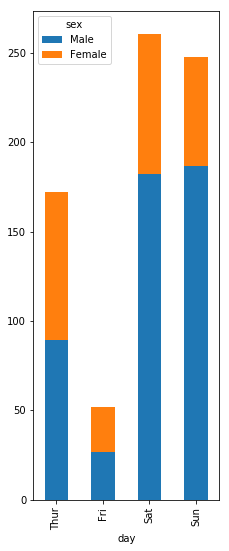

In [11]:
graph = Graph(df)
graph.shs.stacked_barplot("day", "tip", "sex")
graph.set_size(400, 1080)

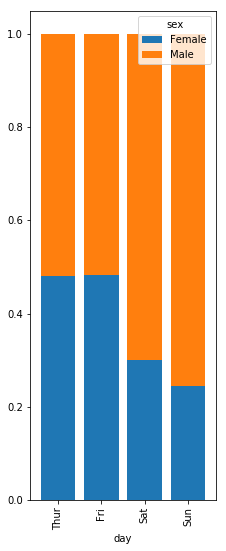

In [12]:
graph = Graph(df)
graph.shs.stacked_barplot("day", "tip", "sex", prop=True, stack_order=["Female", "Male"], width=.8)
graph.set_size(400, 1080)

## Barplots : Dist

``` python3
barplot_dist(column, bin_size, data, ax, filler=None, colors=None, * args, ** kwargs)
```

```args``` and ```kwargs``` are passed through ```seaborn.barplot```

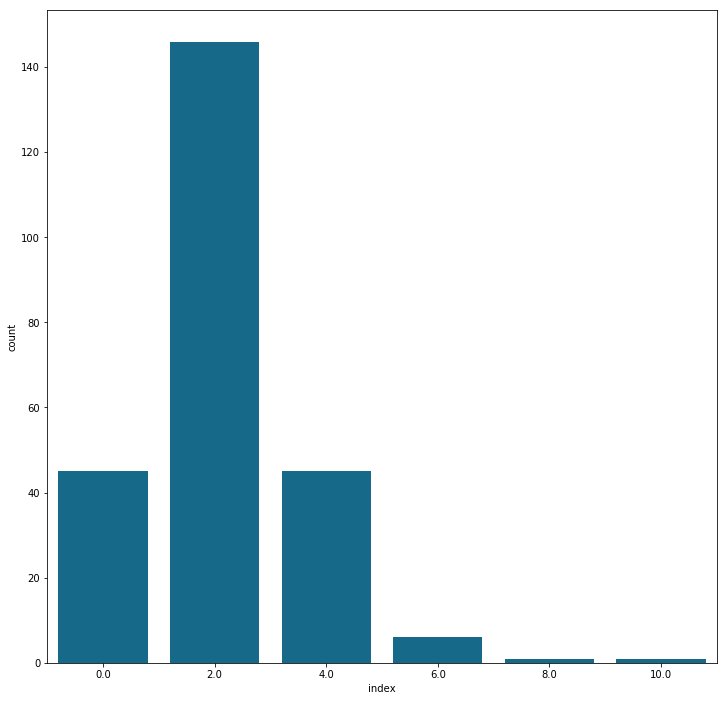

In [14]:
df = gwrap.sns.load_dataset("tips")

graph = Graph(df)
graph.shs.dist_barplot("tip", 2)
graph.set_square()

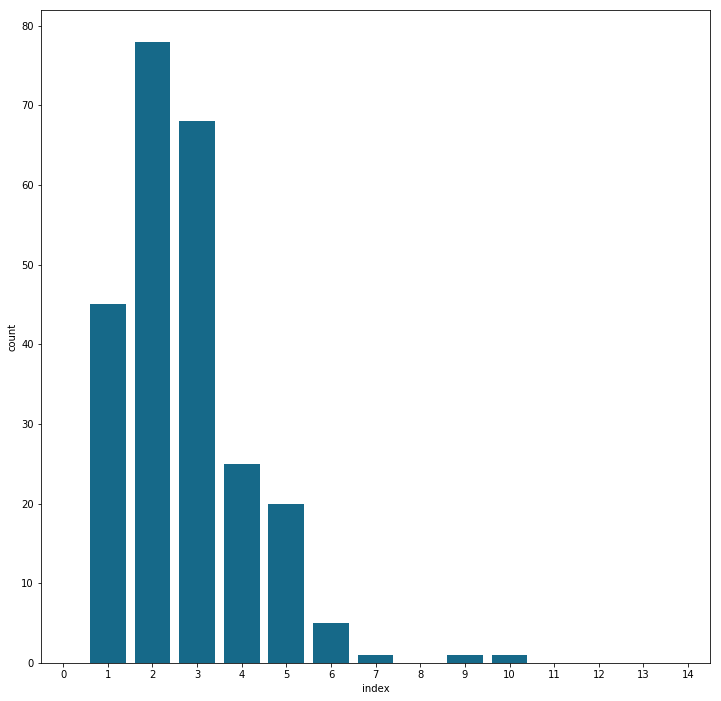

In [16]:
graph = Graph(df)
graph.shs.dist_barplot("tip", 1, filler=range(0, 15))
graph.set_square()

### Circular barplot

circular_barplot(cname, cvalue, data, ax=None, palette=None, sep_width=0.02, bottom=0, 
    corr_values=True, grid_below=True)

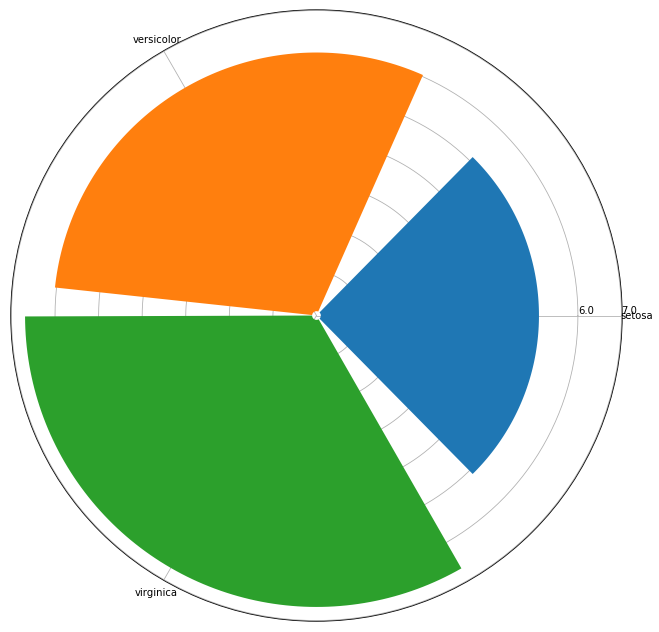

In [17]:
df = gwrap.sns.load_dataset("iris")
df = df.groupby("species")["sepal_length"].mean().rename("sepal_length").reset_index()

graph = Graph(df, projection="polar")
graph.shs.circular_barplot("species", "sepal_length", palette=None, sep_width=0.001, bottom=.1, corr_values=True)